In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [18]:
def distance_Norm2(a, b):
    return np.sqrt((a - b)**2)

def FCM(data, k, q, init_u, iter_num):
    M, N = data.shape
    center = np.zeros((M, k))
    if np.isnan(init_u).all():
        u = np.random.rand(N, k)
    else:
        u = init_u
    
    num = 0
    while num < iter_num:
        center = (data @ (u**q)) / (np.ones((M, 1)) @ np.sum(u**q, axis=0, keepdims=True))
        u1 = u.copy()
        for i in range(N):
            d = distance_Norm2(data[:, i][:, np.newaxis], center)
            a = 1 / d**(2/(q-1))
            b = np.sum(a)
            u[i, :] = a / b
        num += 1
    
    cost= np.zeros((N, k))
    for j in range(k):
        cost[:, j] = u[:, j] * np.sum((data - center[:, j][:, np.newaxis])**2, axis=0)
    J = np.sum(cost)
    
    return center, u, J, num

def hard_treshloding(u):
    N, k = u.shape
    U = np.zeros_like(u)
    I = np.argmax(u, axis=1)
    L = np.arange(0, k * N, k)
    index = I + L
    U.flat[index] = 1
    return U

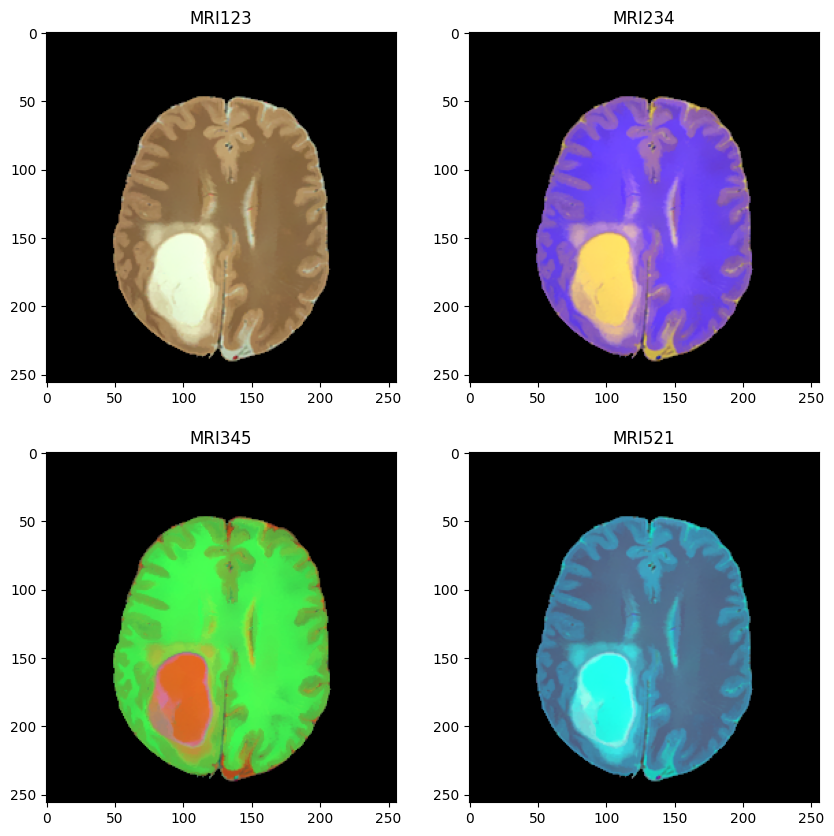

In [19]:
Im1 = cv.imread('Mri1.bmp', cv.IMREAD_GRAYSCALE)
Im2 = cv.imread('Mri2.bmp', cv.IMREAD_GRAYSCALE)
Im3 = cv.imread('Mri3.bmp', cv.IMREAD_GRAYSCALE)
Im4 = cv.imread('Mri4.bmp', cv.IMREAD_GRAYSCALE)
Im5 = cv.imread('Mri5.bmp', cv.IMREAD_GRAYSCALE)

Im123 = np.zeros((Im1.shape[0], Im1.shape[1], 3), dtype=np.uint8)
Im234 = np.zeros((Im1.shape[0], Im1.shape[1], 3), dtype=np.uint8)
Im345 = np.zeros((Im1.shape[0], Im1.shape[1], 3), dtype=np.uint8)
Im135 = np.zeros((Im1.shape[0], Im1.shape[1], 3), dtype=np.uint8)

Im123[:,:,0] = Im1
Im123[:,:,1] = Im2
Im123[:,:,2] = Im3
Im234[:,:,0] = Im2
Im234[:,:,1] = Im3
Im234[:,:,2] = Im4
Im345[:,:,0] = Im3
Im345[:,:,1] = Im4
Im345[:,:,2] = Im5
Im135[:,:,0] = Im5
Im135[:,:,1] = Im2
Im135[:,:,2] = Im1

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(Im123)
axes[0, 0].set_title('MRI123')
axes[0, 1].imshow(Im234)
axes[0, 1].set_title('MRI234')
axes[1, 0].imshow(Im345)
axes[1, 0].set_title('MRI345')
axes[1, 1].imshow(Im135)
axes[1, 1].set_title('MRI521')
plt.show()

## Part 2 - Soft Clustering
#### fuzzy parameter = 5

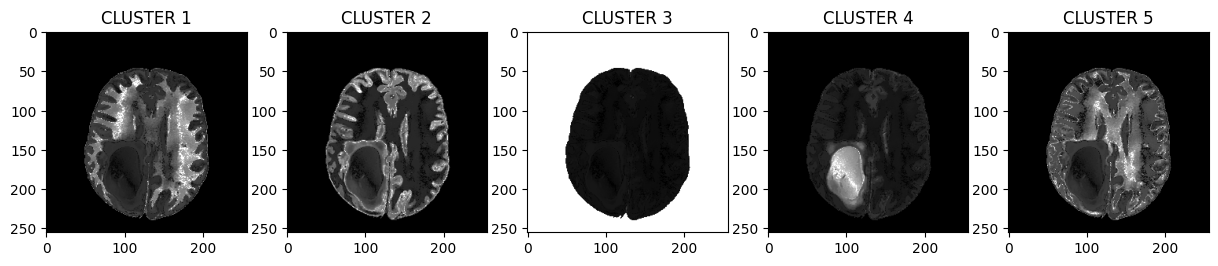

In [20]:
Nc = 5
fuzzy_param = 5
init_u = np.nan
iter_num = 100
data = Im1.flatten().astype(float).reshape(1, -1)
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
U = u.reshape(Im1.shape[0], Im1.shape[1], Nc)

fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 2 - Clustring
#### Fzzy Param = 1.4

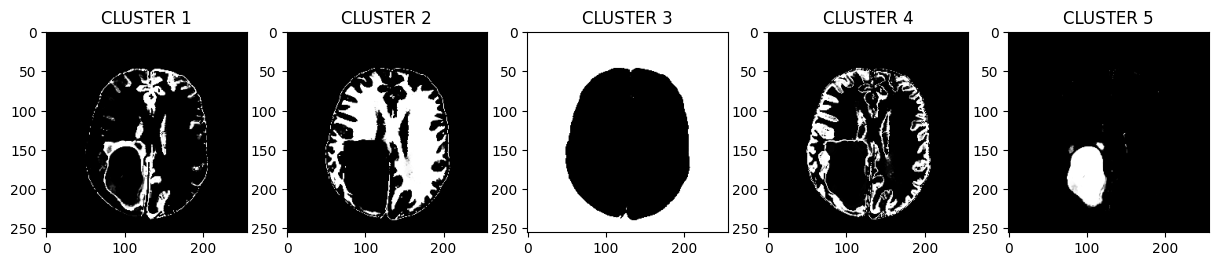

In [21]:
fuzzy_param = 1.4
data = Im1.flatten().astype(float).reshape(1, -1)
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
U = u.reshape(Im1.shape[0], Im1.shape[1], Nc)
fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 2 - Hard Clustering


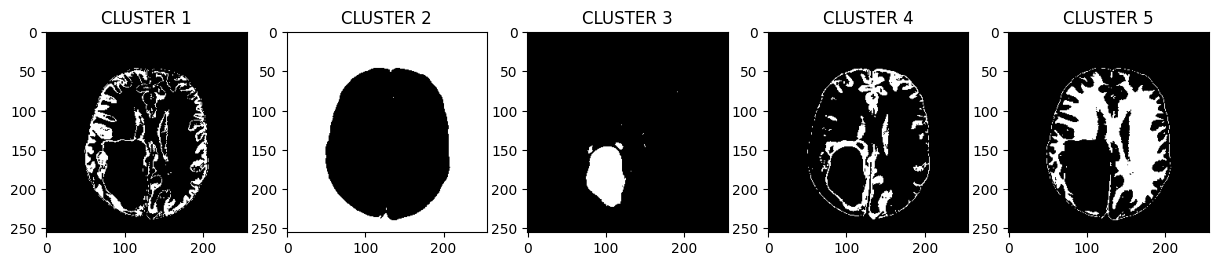

In [22]:
fuzzy_param=5
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
u = hard_treshloding(u)
U = u.reshape(Im1.shape[0], Im1.shape[1], Nc)
fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 3 - Soft Clustering by using K-Means as initialization
#### fuzzy parameter = 5

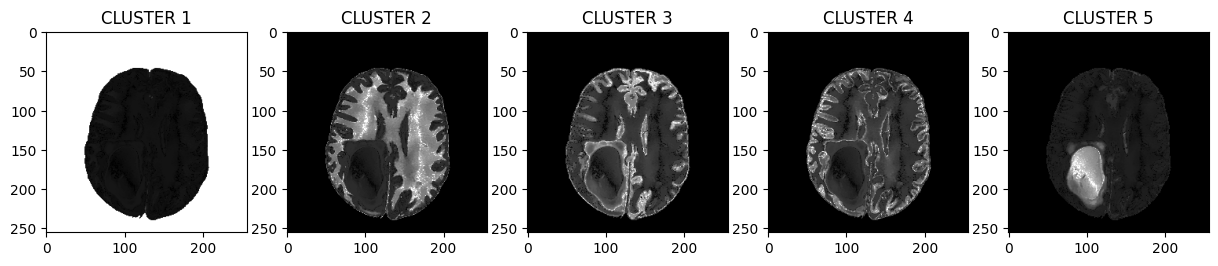

In [23]:
idx = KMeans(n_clusters=Nc).fit_predict(data.T)
init_u = np.zeros((data.shape[1], Nc))
init_u[np.arange(data.shape[1]), idx] = 1
fuzzy_param = 5
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
U_soft_5 = u.reshape(Im1.shape[0], Im1.shape[1], Nc)

fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U_soft_5[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 3 - Clustering by using K-Means as initialization
#### fuzzy parameter = 1.4

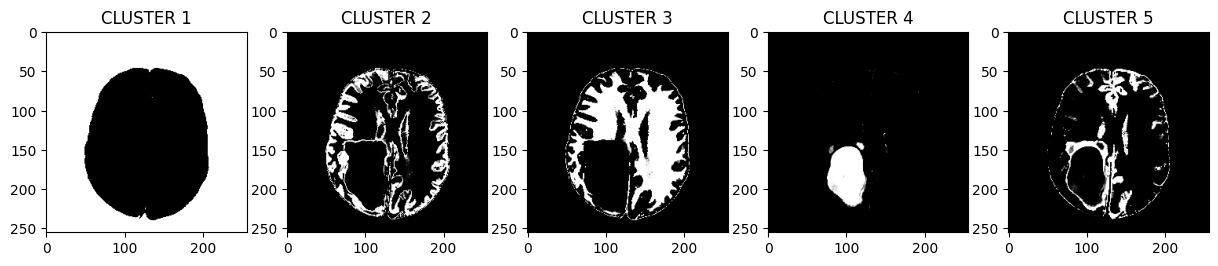

In [24]:
idx = KMeans(n_clusters=Nc).fit_predict(data.T)
init_u = np.zeros((data.shape[1], Nc))
init_u[np.arange(data.shape[1]), idx] = 1
fuzzy_param = 1.4
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
U_fuzzyParam14 = u.reshape(Im1.shape[0], Im1.shape[1], Nc)

fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U_fuzzyParam14[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 3 - Hard Clustering by using K-Means as initialization

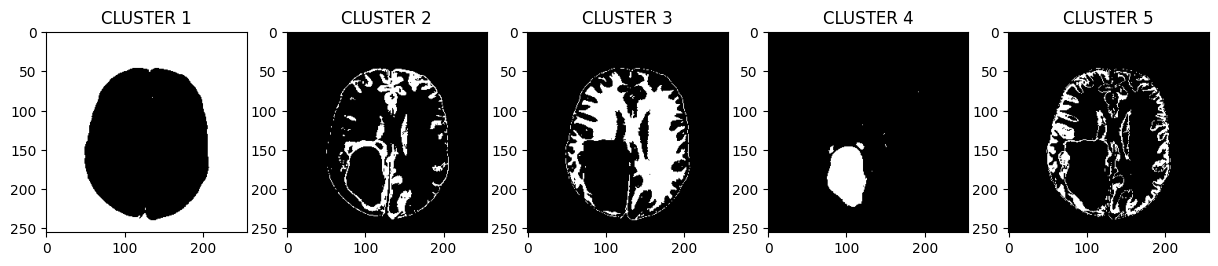

In [9]:
fuzzy_param=5
center, u, J, num = FCM(data, Nc, fuzzy_param, init_u, iter_num)
u = hard_treshloding(u)
U = u.reshape(Im1.shape[0], Im1.shape[1], Nc)
fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()


## Part 4 - GMM Clustering

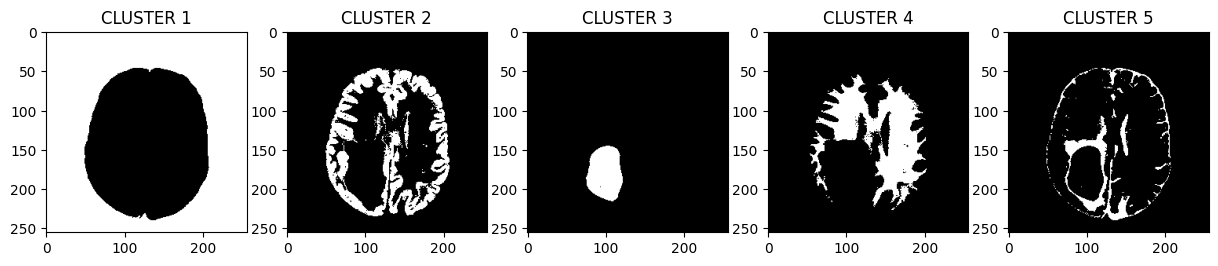

In [10]:
data = np.column_stack([
    Im1.flatten(), Im2.flatten(), Im3.flatten(), Im4.flatten(), Im5.flatten()
])

GMModel = GaussianMixture(n_components=Nc, reg_covar=0.01).fit(data)
idx = GMModel.predict(data)
u = np.zeros((data.shape[0], Nc))
u[np.arange(data.shape[0]), idx] = 1
U = u.reshape(Im1.shape[0], Im1.shape[1], Nc)
fig, axes = plt.subplots(1, Nc, figsize=(15, 5))
for i in range(Nc):
    axes[i].imshow((255 * U[:,:,i]).astype(np.uint8), cmap='gray')
    axes[i].set_title(f'CLUSTER {i+1}')
plt.show()

## Part 5 - Thresholding
### top row: before thresholding bottum row: after thresholding
#### Fuzzy Param 5

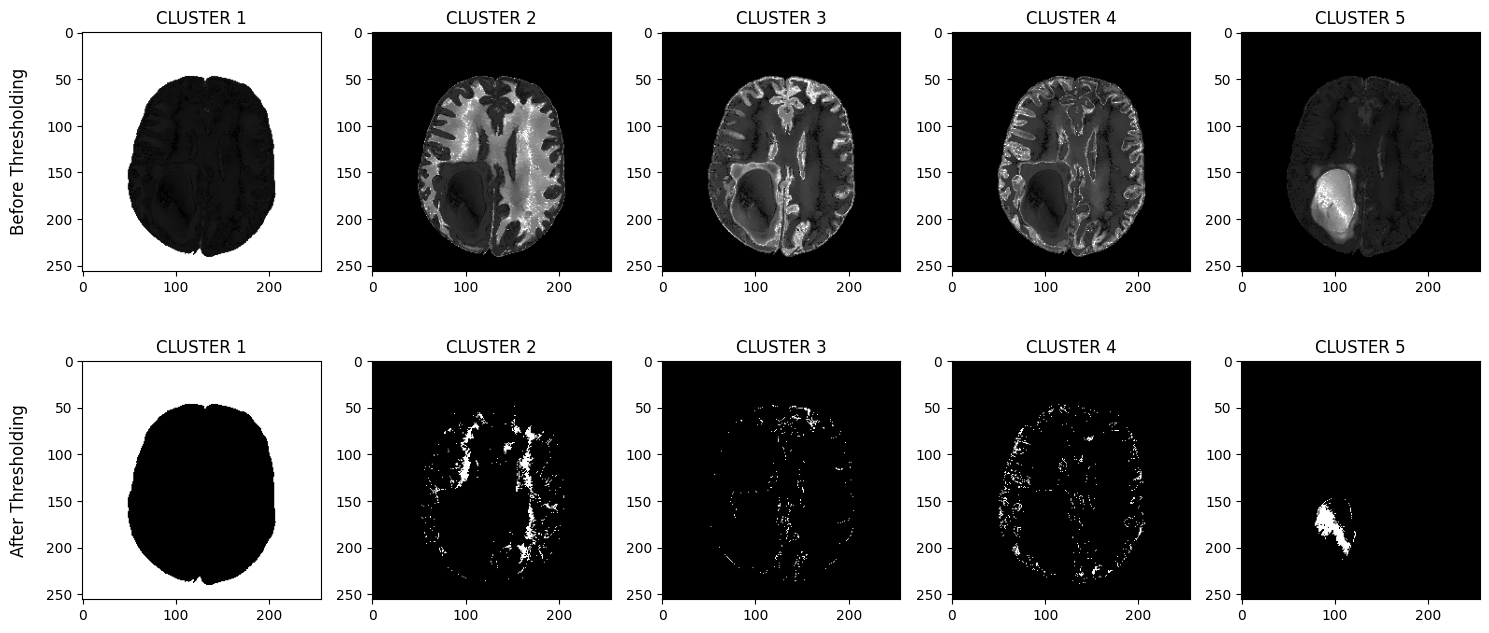

In [31]:
fig, axes = plt.subplots(2, Nc, figsize=(15, 7))
for i in range(Nc):
    axes[0, i].imshow((255 * U_soft_5[:,:,i]).astype(np.uint8), cmap='gray')
    axes[0, i].set_title(f'CLUSTER {i+1}')
Uprime = (U_soft_5 >= 0.6)
for i in range(Nc):
    axes[1, i].imshow((255 * Uprime[:,:,i]).astype(np.uint8), cmap='gray')
    axes[1, i].set_title(f'CLUSTER {i+1}')
axes[0, 0].annotate('Before Thresholding', xy=(0, 0.5), xytext=(-axes[0, 0].yaxis.labelpad - 5, 0),
                    xycoords=axes[0, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

axes[1, 0].annotate('After Thresholding', xy=(0, 0.5), xytext=(-axes[1, 0].yaxis.labelpad - 5, 0),
                    xycoords=axes[1, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Part 5 - Thresholding
### top row: before thresholding bottum row: after thresholding
#### Fuzzy Param 1.4

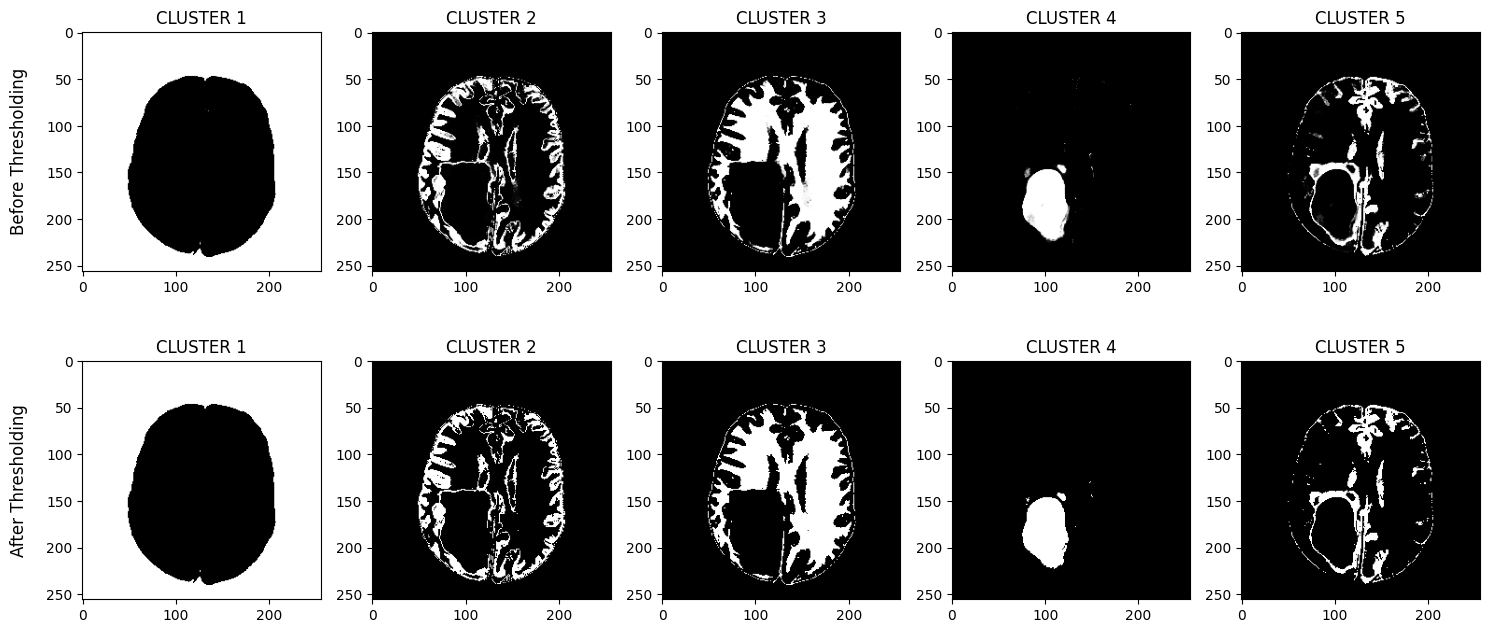

In [32]:
fig, axes = plt.subplots(2, Nc, figsize=(15, 7))
for i in range(Nc):
    axes[0, i].imshow((255 * U_fuzzyParam14[:,:,i]).astype(np.uint8), cmap='gray')
    axes[0, i].set_title(f'CLUSTER {i+1}')
Uprime = (U_fuzzyParam14 >= 0.6)
for i in range(Nc):
    axes[1, i].imshow((255 * Uprime[:,:,i]).astype(np.uint8), cmap='gray')
    axes[1, i].set_title(f'CLUSTER {i+1}')
axes[0, 0].annotate('Before Thresholding', xy=(0, 0.5), xytext=(-axes[0, 0].yaxis.labelpad - 5, 0),
                    xycoords=axes[0, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

axes[1, 0].annotate('After Thresholding', xy=(0, 0.5), xytext=(-axes[1, 0].yaxis.labelpad - 5, 0),
                    xycoords=axes[1, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
